# Abalone Case Study

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.


# Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 



# Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score # model selection

from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
df=pd.read_csv('abalon_dataset.csv')
df.head(5)

,gender,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings(age)
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# EDA:

In [3]:
df.sample(8)

,gender,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings(age)
3757,I,0.520,0.410,0.140,0.6990,0.3395,0.1290,0.1945,10
3672,F,0.595,0.440,0.135,0.9640,0.5005,0.1715,0.2575,10
4051,M,0.625,0.500,0.175,1.0565,0.4615,0.2580,0.3050,10
2129,M,0.595,0.470,0.150,0.8915,0.3590,0.2105,0.2450,12
2885,I,0.505,0.400,0.125,0.5605,0.2255,0.1435,0.1700,8
1528,M,0.725,0.575,0.240,2.2100,1.3510,0.4130,0.5015,13
2908,F,0.580,0.450,0.170,0.9705,0.4615,0.2320,0.2480,9
1460,M,0.485,0.390,0.085,0.6435,0.2945,0.1030,0.1980,8


In [4]:
df.tail(5)

,gender,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings(age)
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [5]:
df.head(6)

,gender,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings(age)
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [6]:
df.dtypes

gender             object
length            float64
diameter          float64
height            float64
whole weight      float64
shucked weight    float64
viscera weight    float64
shell weight      float64
rings(age)          int64
dtype: object

independent columns are in float data format but only gender column is object type and rings(age) which is our target column is integer data type

In [7]:
df=pd.DataFrame(data=df)
df                                      #converting dataset into dataframe to give it a structural format

,gender,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings(age)
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [8]:
df.shape

(4177, 9)

In [9]:
df.columns

Index(['gender', 'length', 'diameter', 'height', 'whole weight',
       'shucked weight', 'viscera weight', 'shell weight', 'rings(age)'],
      dtype='object')

# About the Columns:

1.Gender: Gender of the species, either M/F.

2.length: The measurement or extent of something from end to end.

3.Diameter: A straight line that runs from one side of a figure and passes through the center Measure the diameter of the circle.

4.Height: The measurement of someone or something from head to foot or from base to top.

5.Whole weight: The weight of a person or thing is how heavy they are, measured in units such as kilograms, pounds, or tons.

6.Shucked weight: Shucked weight is supposed to be the weight without the shell.

7.Viscera weight: Visceral fat is fat that wraps around your abdominal organs deep inside your body.

8.Shell weight: Shell weight means that it's primarily a windproof, possibly waterproof shell that is intended to be worn over warmer clothes in cold weather, or by itself in warmer climates.

9.Rings: a small circular band, typically of precious metal and often set with one or more gemstones, worn on a finger as an ornament or a token of marriage, engagement, or authority.

Using problem statement, converting rings to Age.

# Checking null values:

In [10]:
df.isnull().sum()

gender            0
length            0
diameter          0
height            0
whole weight      0
shucked weight    0
viscera weight    0
shell weight      0
rings(age)        0
dtype: int64

<AxesSubplot:>

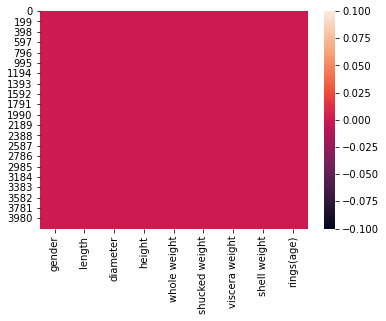

In [11]:
sns.heatmap(df.isnull())

There are no null values in our dataset from above observations

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole weight    4177 non-null   float64
 5   shucked weight  4177 non-null   float64
 6   viscera weight  4177 non-null   float64
 7   shell weight    4177 non-null   float64
 8   rings(age)      4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [13]:
df['gender'].value_counts()           

# As we can see the count of Male, Female and Infant as 1528, 1342 and 1307 respectively

M    1528
I    1342
F    1307
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

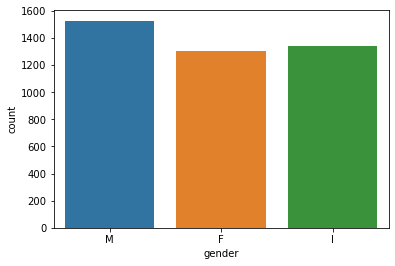

In [14]:
sns.countplot(df['gender'])                       

# The countplot shows the above figures in the Graphical form and giving the counts of Male, Female and Infant

In [15]:
df['gender']

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: gender, Length: 4177, dtype: object

# changing the object values into ineger using label encoder

In [16]:
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])
df

,gender,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings(age)
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


we can see that in gender column, F is replaced by 0 and M is replaced by 2 and I is replaced by 1

# Describing Dataset:

In [17]:
df.describe()

,gender,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings(age)
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Key obervations:

The mean is almost same as median (50th percentile) in all columns there is a more diff in 75% percentile and max in length,diameter, height,whole weight,shucked weight,viscera weight, shell weight and rings also. it  suggest that there are outliers present in these columns

# Describing dataset with heatmap

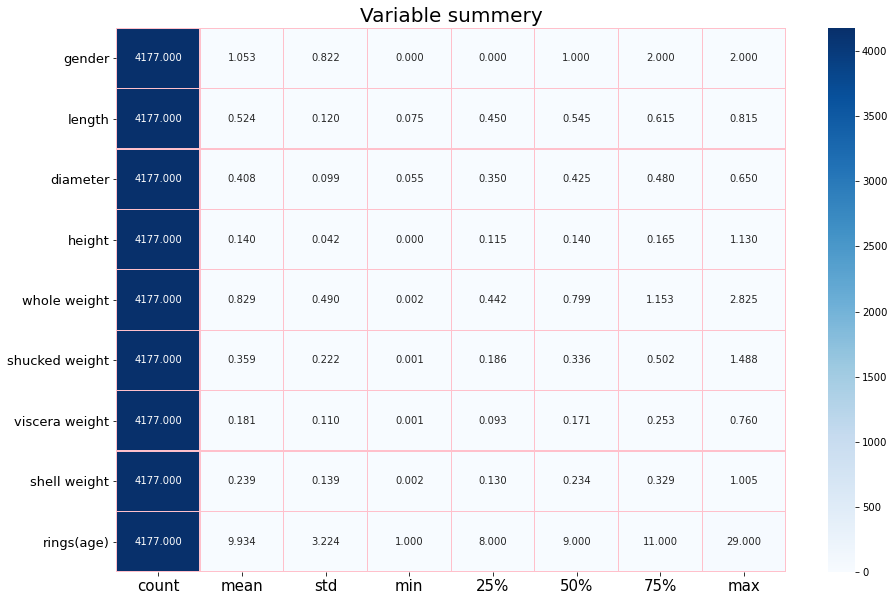

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(df.describe().transpose(),annot=True,fmt='.3f',linewidth=0.1,cmap='Blues',linecolor='pink')
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.title('Variable summery', fontsize=20)
plt.show()

Outcome of describe of datasets:
From above we are determining mean, standard deviation, min. and max. value of each column, which will furthur help us in data cleaning.

Total number of rows and columns in dataset:

 4177 rows

 9 columns

Length:

     1.Mean=0.524
     2.std=0.12
     3.max_value=0.815
     4.min_value=0.075
diameter:

     1.Mean=0.408
     2.std=0.099
     3.max_value=0.650
     4.min_value=0.055
height:

     1.Mean=0.140
     2.std=0.042
     3.max_value=1.130
     4.min_value=0.000
whole weight:

     1.Mean=0.829
     2.std=0.490
     3.max_value=2.825
     4.min_value=0.002
shucked weight:

     1.Mean=0.359
     2.std=0.222
     3.max_value=1.488
     4.min_value=0.001
viscera weight:

     1.Mean=0.181
     2.std=0.110
     3.max_value=0.760
     4.min_value=0.001
shell weight:

     1.Mean=0.239
     2.std=0.139
     3.max_value=1.005
     4.min_value=0.002
rings(age):

     1.Mean=9.934
     2.std=3.224
     3.max_value=29.000
     4.min_value=1.000

rings(age) is our target column.

# Checking correlation:

In [19]:
# Gives the Correlation Matrix of the Independent Variables with the Target Variable 

df_corr=df.corr()
df_corr

,gender,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings(age)
gender,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings(age),-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

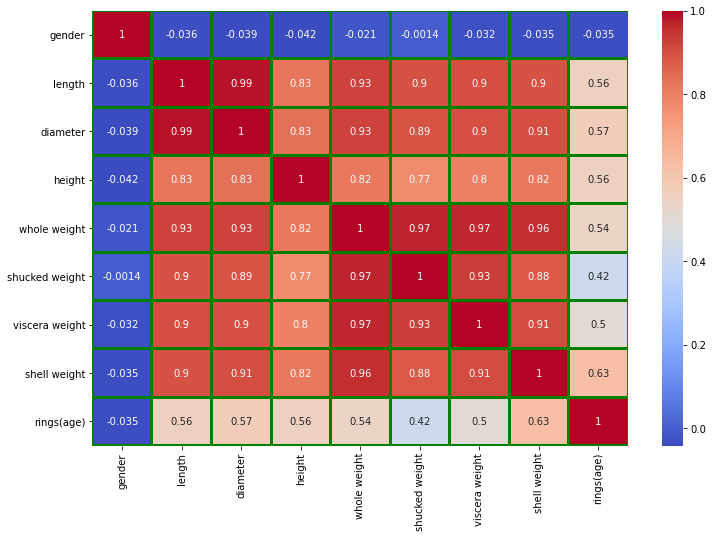

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df_corr,annot=True,linewidths=2,linecolor='green',cmap='coolwarm')
plt.show

# Outcome of Correlation:

All the columns are almost positively correlated with the target column excluding gender.

shell weight is having 63 percent correlation with target column which can be considered as strong bond.

length, diameter, height and whole weight has 56, 57, 56 and 54 percent correlation with target column which we can consider as strong bond.

viscera weight and shucked weight has 50% and 42% correlation with target column and can be considered as strong bond with target column.

Max correlation: shell weight

Min correlation: gender

# Outlier Detection:

In [21]:
df.columns

Index(['gender', 'length', 'diameter', 'height', 'whole weight',
       'shucked weight', 'viscera weight', 'shell weight', 'rings(age)'],
      dtype='object')

In [22]:
#univariate analysis

<AxesSubplot:>

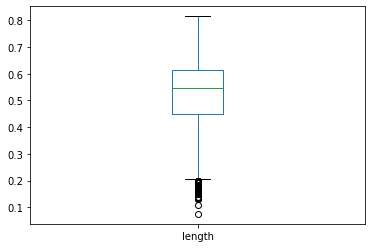

In [23]:
df['length'].plot.box()

we can see the there are many outliers present int his column

<AxesSubplot:>

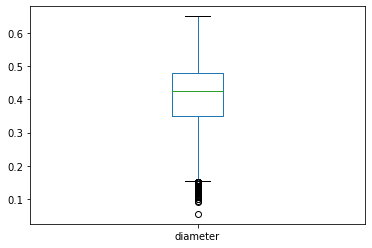

In [24]:
df['diameter'].plot.box()

there are outliers in this variable also

<AxesSubplot:>

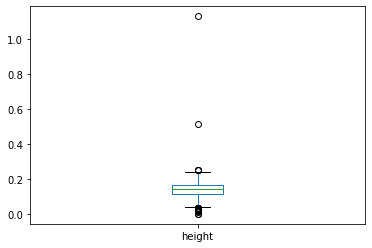

In [25]:
df['height'].plot.box()

in height column also we can see few outliers

<AxesSubplot:>

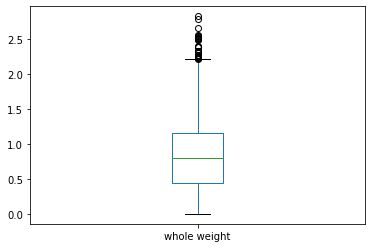

In [26]:
df['whole weight'].plot.box()

outliers are present

<AxesSubplot:>

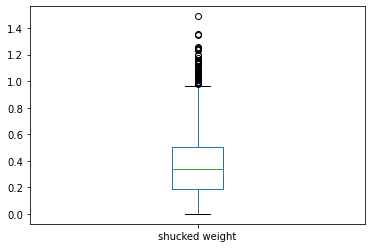

In [27]:
df['shucked weight'].plot.box()

outliers are present in this variable also

<AxesSubplot:>

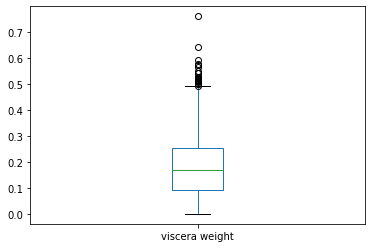

In [28]:
df['viscera weight'].plot.box()

outliers are present 

<AxesSubplot:>

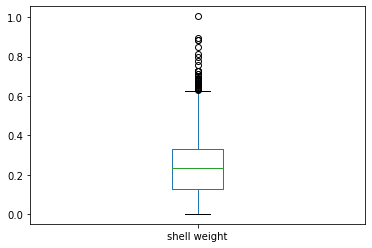

In [29]:
df['shell weight'].plot.box()

in this varibale also we can see more outliers

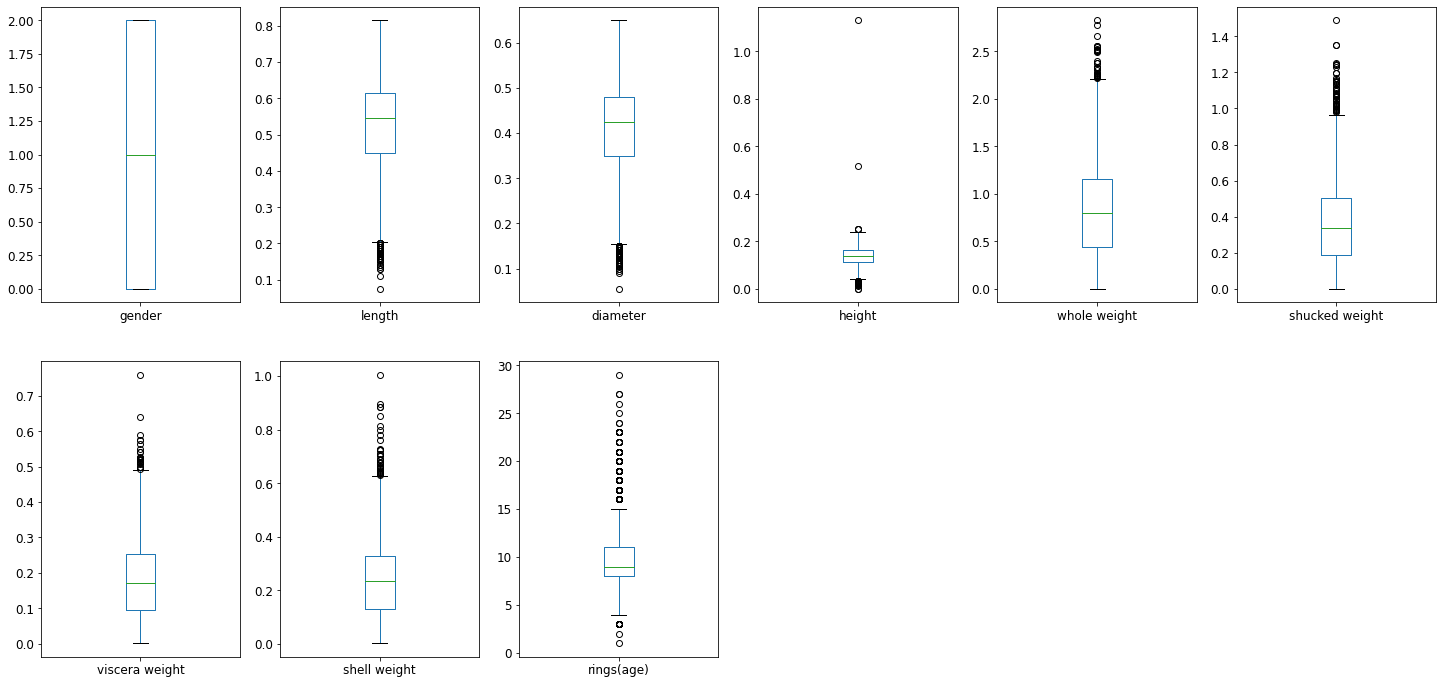

In [30]:
# The Subplot shows boxplots of all the variable at once without passing boxplot function individually for each variable

df.plot(kind='box',subplots=True, layout=(4,6),figsize=(25,25),fontsize=12)
plt.show()

from above observation we can see that except gender, there are outliers present in all the columns

# Checking distribution skewness

In [31]:
df.skew()

gender           -0.098155
length           -0.639873
diameter         -0.609198
height            3.128817
whole weight      0.530959
shucked weight    0.719098
viscera weight    0.591852
shell weight      0.620927
rings(age)        1.114102
dtype: float64

As we can see that all variables are highly skewed and needs to be treated

<AxesSubplot:xlabel='length', ylabel='Density'>

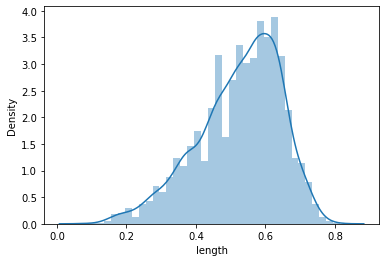

In [32]:
sns.distplot(df["length"])

# The distribution plot shows that data in "Length" is skewed

<AxesSubplot:xlabel='diameter', ylabel='Density'>

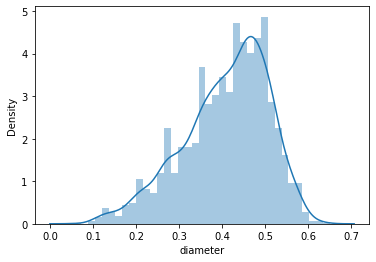

In [33]:
sns.distplot(df["diameter"])

# The distribution plot shows that data in "Diameter" is skewed

<AxesSubplot:xlabel='height', ylabel='Density'>

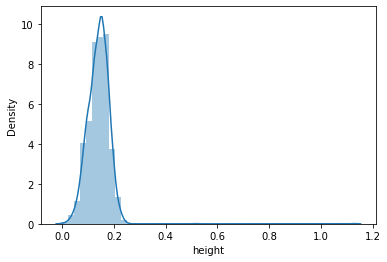

In [34]:
sns.distplot(df["height"])

# The distribution plot shows that data in "Height" is very high skewed

<AxesSubplot:xlabel='whole weight', ylabel='Density'>

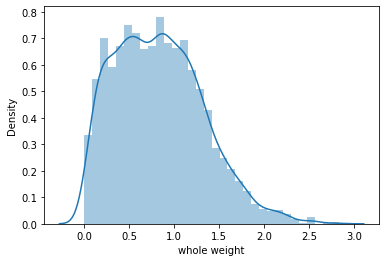

In [35]:
sns.distplot(df["whole weight"])

# The distribution plot shows that data in "Whole Weight" is little right skewed

<AxesSubplot:xlabel='shucked weight', ylabel='Density'>

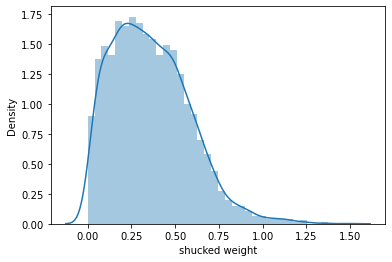

In [36]:
sns.distplot(df["shucked weight"])

# The distribution plot shows that data in "Shucked Weight" is right skewed

<AxesSubplot:xlabel='viscera weight', ylabel='Density'>

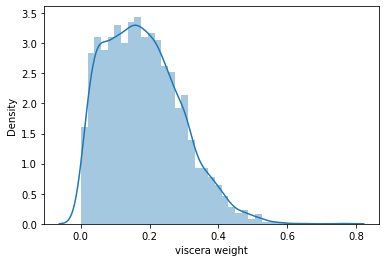

In [37]:
sns.distplot(df["viscera weight"])

# The distribution plot shows that data in "Viscera Weight" is right skewed

<AxesSubplot:xlabel='shell weight', ylabel='Density'>

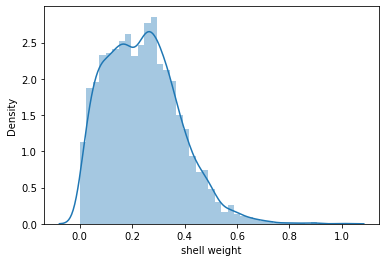

In [38]:
sns.distplot(df["shell weight"])
# The distribution plot shows that data in "Shell Weight" is right skewed

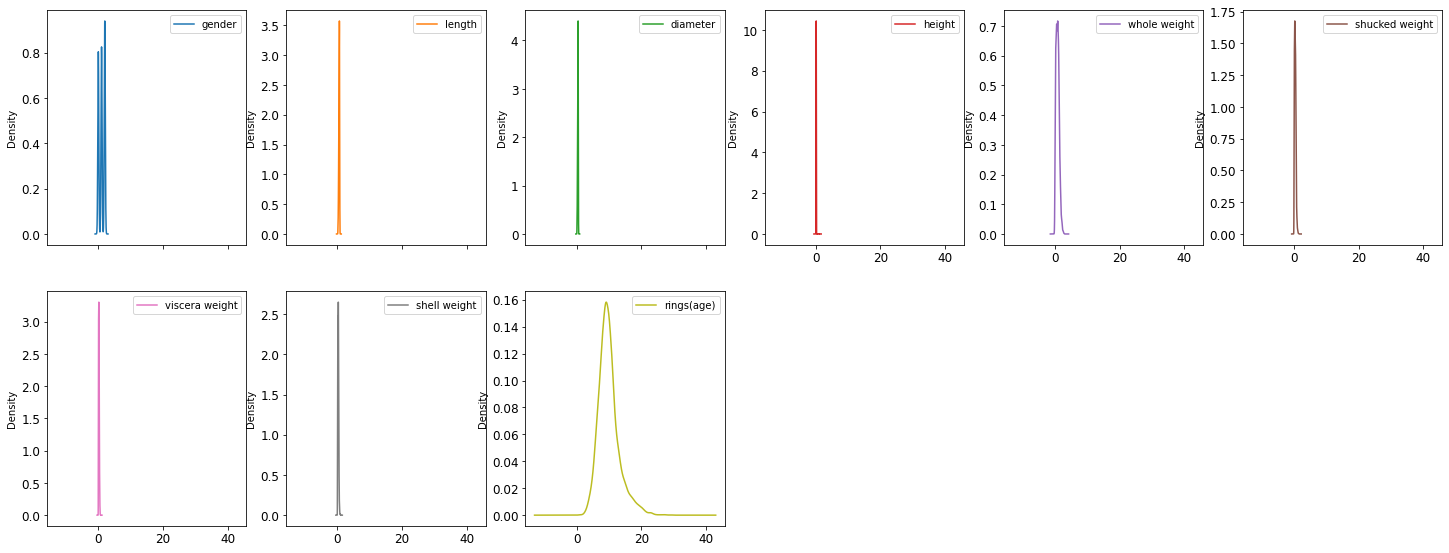

In [39]:
df.plot(kind="kde", subplots=True, layout=(5,6), figsize=(25,25), fontsize=12)
plt.show()

# It shows the subplot of all the Density of distribution plots

# Mutlivariate analysis:

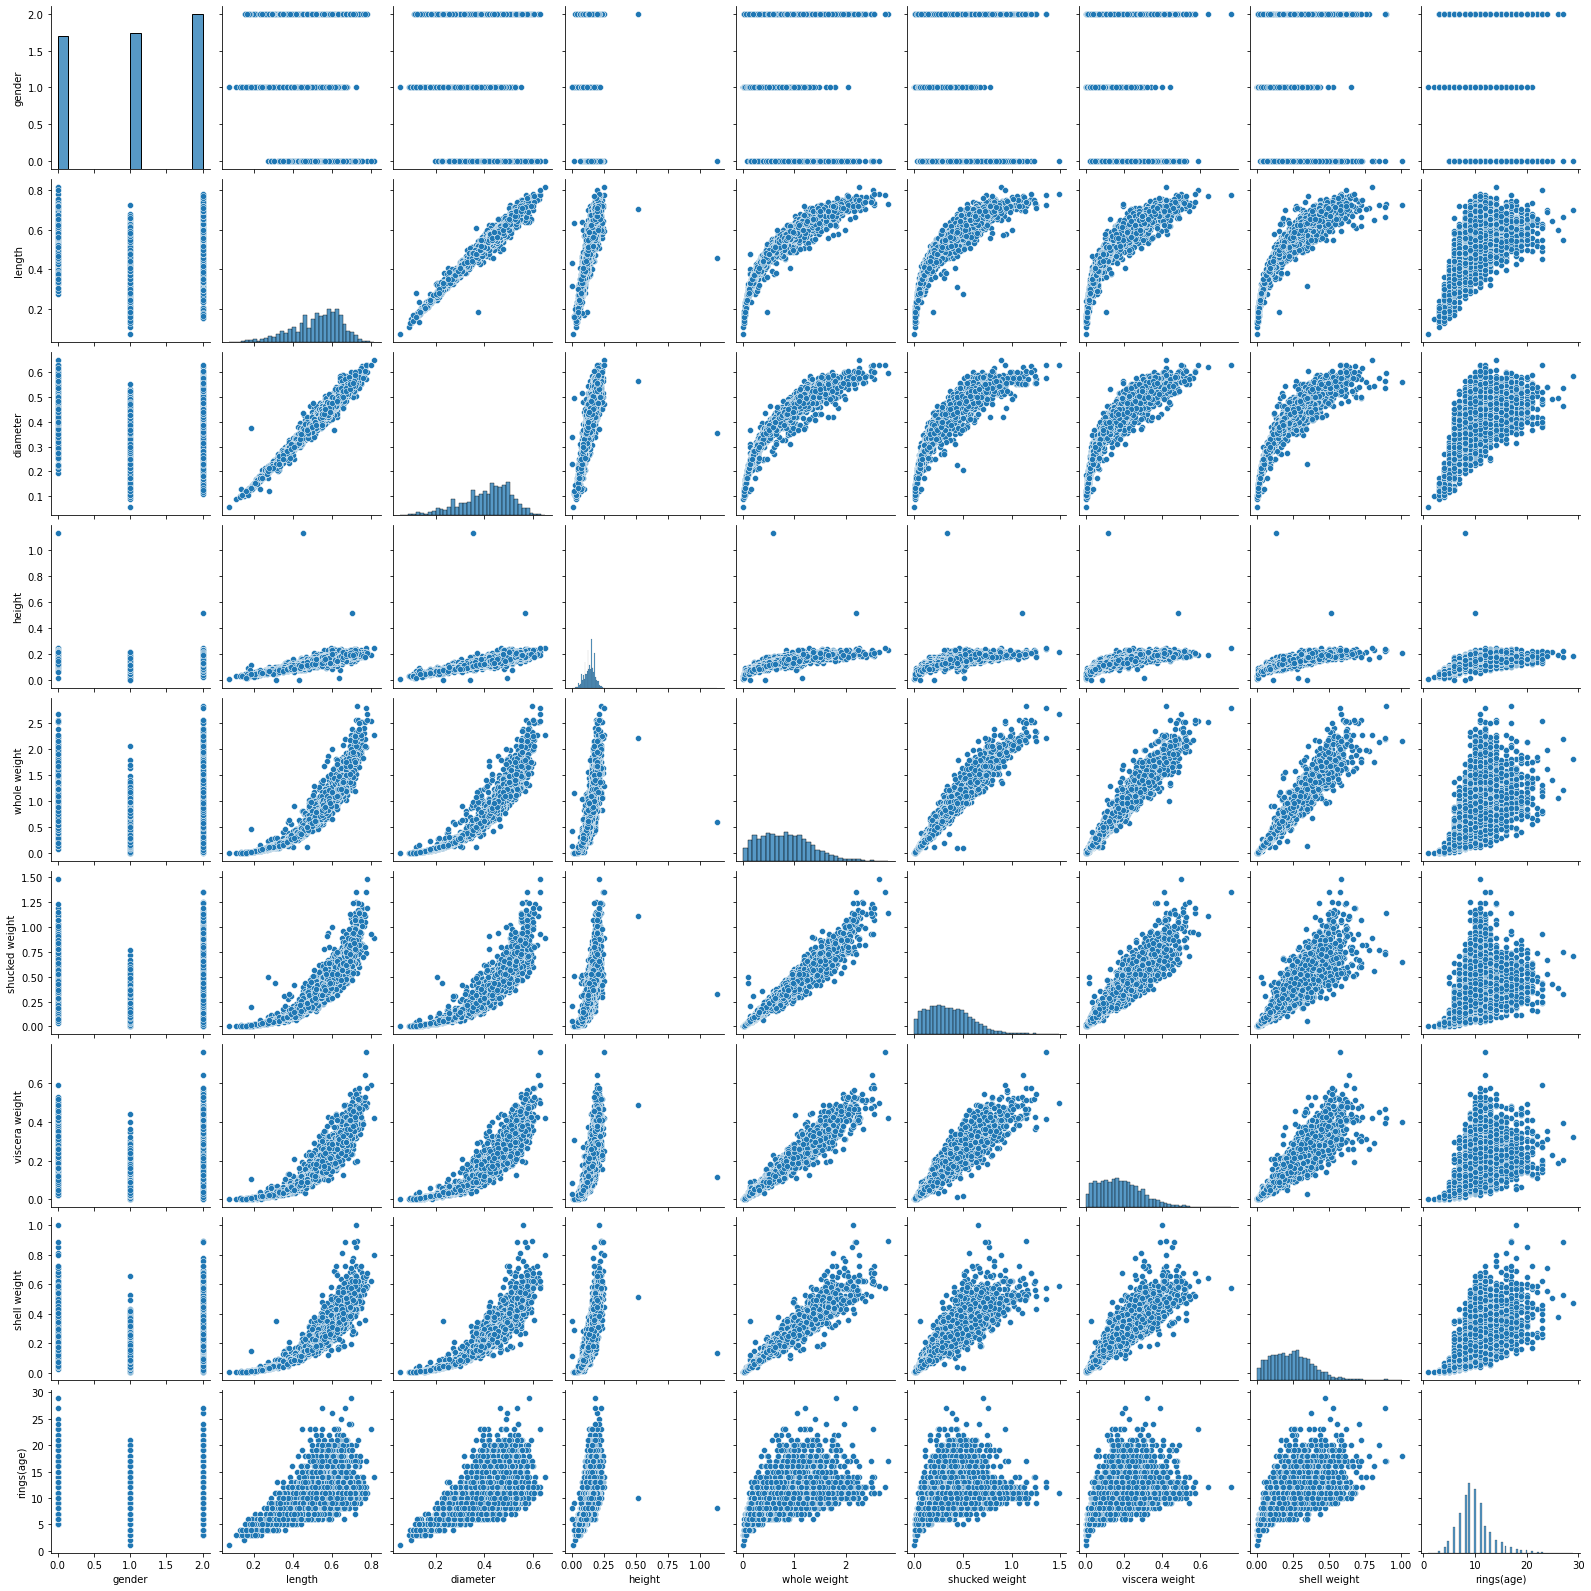

In [40]:
sns.pairplot(df)

# It is showing the correlation of each variable with others in graphical presentation


# Outlier Treatment:

In [41]:
from scipy.stats import zscore

In [42]:
df.drop(columns="gender",inplace=True)

# We will first drop the "Sex" variable as it is an object type

In [43]:
z=np.abs(zscore(df))
z.shape

(4177, 8)

In [44]:
#We are taking threshold=3
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

This is displaying all the rows and columns where the value is above +3 Standard Deviation These are all the index locations of the outliers present in the dataset

In [45]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(4177, 8)
(4027, 8)


In [46]:
df.shape                             #shape of dataset with outliers

(4177, 8)

In [47]:
df_new.shape                         #shape of nw dataset without outliers

(4027, 8)

In [48]:
df_new

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings(age)
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Picking all the Dataset with zscore of Standard Deviation 3 or less and assigning it to new variable "df_new"

# Percentage data loss:

In [49]:
Data_loss=((4177-4027)/4177)*100
Data_loss

3.5910940866650707

Percentage loss is not more than 5 percent.

# Skewness removal:


# splitting the independent and target variable in x and y before removing skewness

In [50]:
x=df_new.iloc[:,:-1]
x                             #taking all independent variable into x

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [51]:
y=df_new.iloc[:,-1]
y                                   #taking dependent variable into y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: rings(age), Length: 4027, dtype: int64

In [52]:
x.skew()

# Checking the skewness of all independent variables
# few columns are skewed, Normal Range = +0.5 to -0.5

length           -0.623076
diameter         -0.598650
height           -0.244251
whole weight      0.334204
shucked weight    0.458295
viscera weight    0.437116
shell weight      0.349471
dtype: float64

In [53]:
from sklearn.preprocessing import power_transform

# Importing the power_transform function to reduce the over skewness in dataset

In [54]:
x_new=power_transform(x)
df_new=pd.DataFrame(x_new,columns=x.columns)

# Applying power_transform function and making new data frame of modified skewness dataset

In [55]:
df_new.skew()
# New and improved skewness is what we are getting after applying power_transform function

length           -0.082985
diameter         -0.080956
height           -0.015962
whole weight     -0.016797
shucked weight    0.021815
viscera weight    0.035902
shell weight      0.016660
dtype: float64

In [56]:
x=df_new 

# Saving the df_new variable in x as it contains the transformed data 

In [57]:
x

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight
0,-0.684451,-0.543379,-1.158933,-0.575135,-0.540865,-0.688032,-0.586354
1,-1.411739,-1.401132,-1.280406,-1.354050,-1.311318,-1.332854,-1.332717
2,-0.046219,0.037163,-0.128305,-0.184498,-0.362705,-0.240373,-0.080214
3,-0.799651,-0.543379,-0.395963,-0.570150,-0.592261,-0.539936,-0.542533
4,-1.530577,-1.474343,-1.518600,-1.414577,-1.378735,-1.451548,-1.482926
...,...,...,...,...,...,...,...
4022,0.289495,0.390420,0.716250,0.277874,0.217107,0.690782,0.227258
4023,0.545081,0.269661,-0.128305,0.441584,0.534924,0.474179,0.314936
4024,0.651129,0.705921,1.943633,0.853434,0.901897,1.089651,0.663632
4025,0.926064,0.837713,0.286070,0.697385,0.924153,0.876428,0.577520


In [58]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: rings(age), Length: 4027, dtype: int64

In [59]:
x.shape

(4027, 7)

In [60]:
y.shape

(4027,)

# Applying standard scaler:

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.68445079, -0.54337947, -1.15893308, ..., -0.54086524,
        -0.68803217, -0.58635376],
       [-1.4117394 , -1.40113174, -1.28040611, ..., -1.31131805,
        -1.33285416, -1.33271691],
       [-0.0462191 ,  0.03716259, -0.12830502, ..., -0.36270513,
        -0.24037305, -0.08021413],
       ...,
       [ 0.65112915,  0.70592133,  1.94363286, ...,  0.90189694,
         1.08965131,  0.66363183],
       [ 0.92606411,  0.8377131 ,  0.28606972, ...,  0.92415296,
         0.87642835,  0.57752029],
       [ 1.9719402 ,  1.85550496,  1.62558351, ...,  2.31446634,
         1.73214622,  1.85675543]])

In [62]:
y.value_counts()

9     686
10    625
8     566
11    472
7     391
6     258
12    251
13    199
14    119
5     113
15    102
16     62
17     53
4      49
18     39
19     32
3      10
Name: rings(age), dtype: int64

In [63]:
print(x.shape)
print(y.shape)

(4027, 7)
(4027,)


# Model Building

# Finding best random state

In [64]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    train_score=lr.score(x_train,y_train)
    test_score=lr.score(x_test,y_test)
    acc= r2_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('max score:',maxacc*100,'\nmax random state:',maxrs,'\ntrain score:',train_score*100,'\ntest score:',test_score*100)

max score: 56.19126254283924 
max random state: 172 
train score: 51.57535416400086 
test score: 50.082664427151435


In [65]:
# train test split for best random state

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=172)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3020, 7), (3020,), (1007, 7), (1007,))

# LinearRegression model

In [66]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
acc=r2_score(y_test,pred)
train_score=lr.score(x_train,y_train)
test_score=lr.score(x_test,y_test)
print('--------------------------Linear Regression------------------')
print(f'\nmean squared error :{mean_squared_error(y_test,pred)}')
print(f'\nmodel accuracy:{acc*100:.2f}%')
print(f'train score:{train_score*100:.2f}%')
print(f'test score:{test_score*100:.2f}%')


--------------------------Linear Regression------------------

mean squared error :3.823531703012928

model accuracy:56.19%
train score:49.36%
test score:56.19%


# Decision tree regressor model

In [67]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
acc=r2_score(y_test,pred)
train_score=dtc.score(x_train,y_train)
test_score=dtc.score(x_test,y_test)
print('---------------------Decision Tree Regression-----------')
print(f'\nmean squared error : {mean_squared_error(y_test,pred)}')
print(f'\nmodel accuracy: {acc*100: .2f}%')
print(f'train score: {train_score*100:.2f}%')
print(f'test score: {test_score*100:.2f}%')

---------------------Decision Tree Regression-----------

mean squared error : 7.127110228401191

model accuracy:  18.34%
train score: 100.00%
test score: 18.34%


# KNeighbors regressor model

In [68]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
pred=knr.predict(x_test)
acc=r2_score(y_test,pred)
train_score=knr.score(x_train,y_train)
test_score=knr.score(x_test,y_test)
print('--------------------------KNeighbors Regressor------------------')
print(f'\nmean squared error :{mean_squared_error(y_test,pred)}')
print(f'\nmodel accuracy:{acc*100:.2f}%')
print(f'train score:{train_score*100:.2f}%')
print(f'test score:{test_score*100:.2f}%')

--------------------------KNeighbors Regressor------------------

mean squared error :4.161747765640516

model accuracy:52.32%
train score:63.44%
test score:52.32%


# Support Vector regressor model

In [69]:
svr=SVR()
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
acc=r2_score(y_test,pred)
train_score=svr.score(x_train,y_train)
test_score=svr.score(x_test,y_test)
print('--------------------------Support Vector Regressor------------------')
print(f'\nmean squared error :{mean_squared_error(y_test,pred)}')
print(f'\nmodel accuracy:{acc*100:.2f}%')
print(f'train score:{train_score*100:.2f}%')
print(f'test score:{test_score*100:.2f}%')

--------------------------Support Vector Regressor------------------

mean squared error :3.742438330246555

model accuracy:57.12%
train score:52.60%
test score:57.12%


# Random Forest regressor model

In [70]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
acc=r2_score(y_test,pred)
train_score=rfr.score(x_train,y_train)
test_score=rfr.score(x_test,y_test)
print('--------------------------Random Forest Regressor------------------')
print(f'\nmean squared error :{mean_squared_error(y_test,pred)}')
print(f'\nmodel accuracy:{acc*100:.2f}%')
print(f'train score:{train_score*100:.2f}%')
print(f'test score:{test_score*100:.2f}%')


--------------------------Random Forest Regressor------------------

mean squared error :3.781680139026812

model accuracy:56.67%
train score:93.13%
test score:56.67%


# AdaBoost regressor model

In [71]:
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
pred=abr.predict(x_test)
acc=r2_score(y_test,pred)
train_score=abr.score(x_train,y_train)
test_score=abr.score(x_test,y_test)
print('--------------------------AdaBoost Regressor------------------')
print(f'\nmean squared error :{mean_squared_error(y_test,pred)}')
print(f'\nmodel accuracy:{acc*100:.2f}%')
print(f'train score:{train_score*100:.2f}%')
print(f'test score:{test_score*100:.2f}%')

--------------------------AdaBoost Regressor------------------

mean squared error :4.9485849297350315

model accuracy:43.30%
train score:39.47%
test score:43.30%


# applying lasso and ridge

In [72]:
lassocv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lassocv.fit(x_train,y_train)
alpha=lassocv.alpha_
print('alpha:',alpha)

lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)
pred=lasso_reg.predict(x_test)
acc=r2_score(y_test,pred)
train_score=lasso_reg.score(x_train,y_train)
test_score=lasso_reg.score(x_test,y_test)
print('-----------lasso------------------')
print(f'\nmean squared error :{mean_squared_error(y_test,pred)}')
print(f'\nmodel accuracy:{acc*100:.2f}%')
print(f'train score:{train_score*100:.2f}%')
print(f'test score:{test_score*100:.2f}%')

alpha: 3.1897616093977e-05
-----------lasso------------------

mean squared error :3.8235027543321625

model accuracy:56.19%
train score:49.36%
test score:56.19%


In [73]:
ridcv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridcv.fit(x_train,y_train)
alpha=ridcv.alpha_
print('alpha:',alpha)

rid_reg=Ridge(alpha)
rid_reg.fit(x_train,y_train)
pred=rid_reg.predict(x_test)
acc=r2_score(y_test,pred)
train_score=rid_reg.score(x_train,y_train)
test_score=rid_reg.score(x_test,y_test)
print('-------------Ridge------------------')
print(f'\nmean squared error :{mean_squared_error(y_test,pred)}')
print(f'\nmodel accuracy:{acc*100:.2f}%')
print(f'train score:{train_score*100:.2f}%')
print(f'test score:{test_score*100:.2f}%')

alpha: 0.001
-------------Ridge------------------

mean squared error :3.8235289773639742

model accuracy:56.19%
train score:49.36%
test score:56.19%


# appling cross validation

In [74]:
# try to improve accuracy through cross validation  
m=[lr,dtc,knr,svr,rfr,abr,lasso_reg,rid_reg]           #scaled for other models for cross validation
for i in m:
    scr_=cross_val_score(i,x,y,cv=5)
    print('----------',i,'------------')
    print(f'cross validation score:{scr_.mean()*100:.2f}\n') 

---------- LinearRegression() ------------
cross validation score:42.35

---------- DecisionTreeRegressor() ------------
cross validation score:-7.08

---------- KNeighborsRegressor() ------------
cross validation score:37.52

---------- SVR() ------------
cross validation score:48.31

---------- RandomForestRegressor() ------------
cross validation score:44.76

---------- AdaBoostRegressor() ------------
cross validation score:15.25

---------- Lasso(alpha=3.1897616093977e-05) ------------
cross validation score:42.35

---------- Ridge(alpha=0.001) ------------
cross validation score:42.35



# Hyperparameter Tuning

# SVR model has the least differnce 

In [75]:
#creating parameter list to pass in GridSearchCV

parameters={'kernel':['linear','poly','sigmoid'],
           'gamma':['scale','auto','float']}


# Setting the Parameters to apply to GridSearchCV to get the best parameter score

In [76]:
GCV=GridSearchCV(SVR(),parameters,cv=5,scoring="accuracy")

GCV.fit(x_train,y_train)         #fitting data in model

GCV.best_params_                 #Printing the best parameters found by GridSearchCV

{'gamma': 'scale', 'kernel': 'linear'}

# direct applying best estimators

In [77]:
svr=GCV.best_estimator_
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
acc=r2_score(y_test,pred)
train_score=svr.score(x_train,y_train)
test_score=svr.score(x_test,y_test)
print('--------------------------AdaBoost Regressor------------------')
print(f'\nmean squared error :{mean_squared_error(y_test,pred)}')
print(f'\nmodel accuracy:{acc*100:.2f}%')
print(f'train score:{train_score*100:.2f}%')
print(f'test score:{test_score*100:.2f}%')

--------------------------AdaBoost Regressor------------------

mean squared error :3.968808172626427

model accuracy:54.53%
train score:47.11%
test score:54.53%


# Final Accuracy is 54.53%

# Saving the best model

In [78]:
import pickle
file="Abalon_case_Study.pkl"
pickle.dump(svr,open(file,'wb'))